# `Bibliotecas Necessárias`

In [3]:
import numpy as np
from func_main import f, df
import pandas as pd
import matplotlib.pyplot as plt
import time

# `Newton Raphson Modificado`
## Parâmetros utilizados no Método:
1. Derivada da Função
- `Q`: Valor atual de `Q`
- `C`: Constante utilizada na função `f`
2. Função principal
- `C`: Constante utilizada na função `f`
- `x0`: Primeiro chute inicial
- `err1`: Tolerância para o erro absoluto da função
- `max_iter`: Número máximo de iterações permitidas
## Passo a Passo do Algoritmo:
1. Define o chute inicial `x0` como o valor atual `x1`
    - Verifica se o chute inicial `x0` já está suficientemente perto de zero
    - Se já estiver perto de zero retorna o valor
2. Loop para realizar o método de Newton modificado até o número máximo de iterações
    -  Calcula o próximo valor de `Q` usando o método de Newton
    -  Verifica se a solução está dentro do erro permitido ou se a mudança é pequena o suficiente
    -  Se a solução for aceitável, retorna o valor
    -  Atualiza o valor de `x1` para o próximo loop
3. Se o método não convergir dentro do número máximo de iterações, retorna o último valor calculado

In [4]:
def df(Q, C):
    return C * np.exp(Q) - 8 * Q
def newton_mod(C, x0, err, max_iter=100):
    x1 = x0
    start_time = time.time()
    num_iterations = 0
    if abs(f(x0, C)) < err:
        return x1, 0, 0, 0  # Se já está dentro do erro, retorna sem calcular mais nada
    for i in range(max_iter):
        num_iterations += 1
        denom = df(x1, C)
        if denom == 0:
            return x1, None, time.time() - start_time, num_iterations  # Evitar divisão por zero
        x2 = x1 - f(x1, C) / denom
        if abs(f(x2, C)) < err or abs(x2 - x1) < err:
            break
        x1 = x2
    end_time = time.time()
    final_error = abs(f(x2, C))
    return x2, final_error, end_time - start_time, num_iterations

# Comparação Para Diferentes Custos 
1. Listamos diferentes valores e depois calculamos um loop para iterar sobre os diferentes valores
2. Na outra célula nós plotamos uma tabela e gráficos de comparações para os diferentes valores de C

In [5]:
#Lista de variação do C
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial
err = 1e-4  # Tolerância de erro

results = []
for C in c_values:
    root, final_error, execution_time, num_iterations = newton_mod(C, x0, err)
    results.append((C, root.round(4), final_error, execution_time, num_iterations))
for result in results:
    print(f"C: {result[0]}, Root: {result[1]:.4f}, Error: {result[2]:.12f}, Time: {result[3]:.8f}s, Iterations: {result[4]}")

C: 1, Root: 0.7148, Error: 0.000021855351, Time: 0.00003791s, Iterations: 3
C: 2, Root: 2.6179, Error: 0.000000027630, Time: 0.00004005s, Iterations: 7
C: 3, Root: -0.6315, Error: 0.000003065317, Time: 0.00001931s, Iterations: 6
C: 4, Root: -0.7035, Error: 0.000000043996, Time: 0.00003147s, Iterations: 5
C: 5, Root: -0.7633, Error: 0.000002843445, Time: 0.00002623s, Iterations: 4


In [6]:
# Criar um DataFrame a partir dos resultados
pd.options.display.float_format = '{:.12f}'.format
df_results = pd.DataFrame(results, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações'])
display(df_results)

,Custo (Bilhões),Raiz Encontrada,Erro,Tempo (s),Iterações
0,1,0.714800000000,0.000021855351,0.000037908554,3
1,2,2.617900000000,0.000000027630,0.000040054321,7
2,3,-0.631500000000,0.000003065317,0.000019311905,6
3,4,-0.703500000000,0.000000043996,0.000031471252,5
4,5,-0.763300000000,0.000002843445,0.000026226044,4


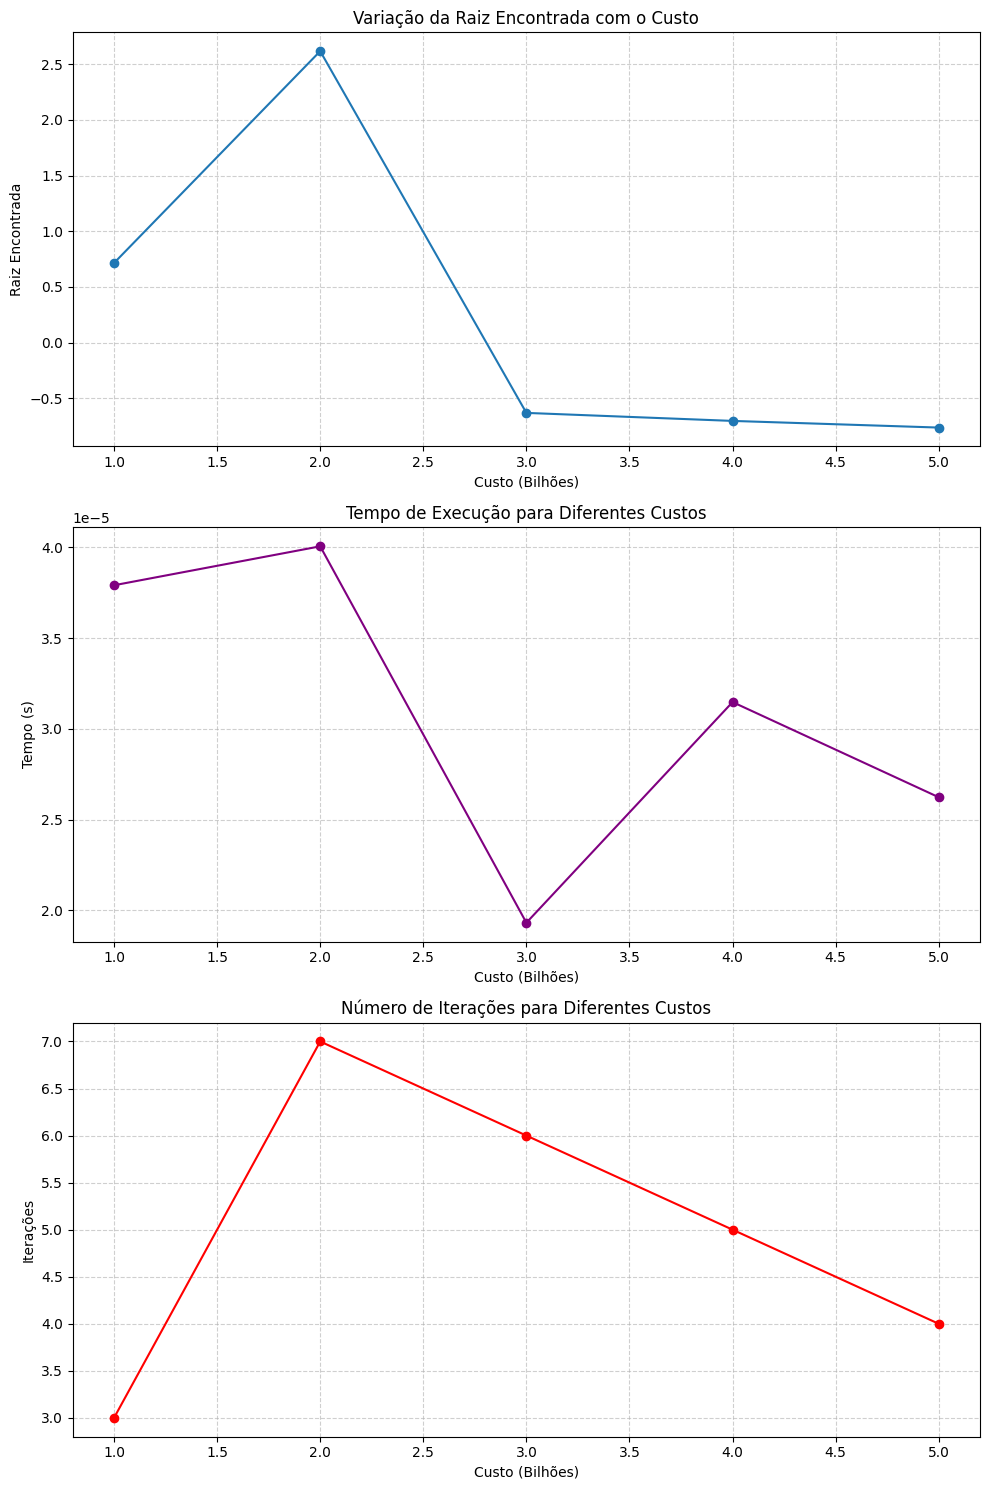

In [7]:
# Plotar gráficos comparativos de Raiz Encontrada, Tempo e Iterações
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de Raiz Encontrada
axs[0].plot(df_results['Custo (Bilhões)'], df_results['Raiz Encontrada'], marker='o', linestyle='-')
axs[0].set_title('Variação da Raiz Encontrada com o Custo')
axs[0].set_xlabel('Custo (Bilhões)')
axs[0].set_ylabel('Raiz Encontrada')
axs[0].grid(axis='both', linestyle='--', alpha=0.6)

# Gráfico de Tempo
axs[1].plot(df_results['Custo (Bilhões)'], df_results['Tempo (s)'], color='purple', marker='o', linestyle='-')
axs[1].set_title('Tempo de Execução para Diferentes Custos')
axs[1].set_xlabel('Custo (Bilhões)')
axs[1].set_ylabel('Tempo (s)')
axs[1].grid(axis='both', linestyle='--', alpha=0.6)

# Gráfico de Iterações
axs[2].plot(df_results['Custo (Bilhões)'], df_results['Iterações'], color='red', marker='o', linestyle='-')
axs[2].set_title('Número de Iterações para Diferentes Custos')
axs[2].set_xlabel('Custo (Bilhões)')
axs[2].set_ylabel('Iterações')
axs[2].grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# `Método da Secante`
## Parâmetros Utilizados no Método: 
1. Função principal
- `C`: Constante utilizada na função `f`
- ``x0``: Primeiro chute inicial
- ``x1``: Segundo chute inicial
- `err1`: Tolerância para o erro absoluto da função
- `err2`: Tolerância para a diferença entre chutes consecutivos
- `max_iter`: Número máximo de iterações permitidas

2. Segunda função (analise sinais)
- `C`: Constante utilizada na função `f`
- `a`: Primeiro chute inicial
- `int_max`: Número máximo de iterações para tentar encontrar um intervalo
## Passo a Passo do Algoritmo:
1. Contador para as iterações
2. Verificamos se o primeiro chute ``x0`` está suficientemente próximo da raiz, se sim retorna ``x0``
3. Verificamos se o segundo chute `x1` está suficientemente próximo da raiz
    - Ou se a diferença de `x1` e `x0` é menor que o erro permitido, se sim insere o resultado e retorna `x1`
4. Loop para executar o método da secante até o `max itter`
    - Calculamos o próximo valor de `x` usando a fórmula da secante
    - Verificamos se o novo valor `x2` atende ao critério de convergência
    - Se `f(x2)` está menor que o erro permitido ou a diferença entre `x2` e `x1` é menor que o erro permitido, se sim retorna `x2`
    - Atualizamos `x0` e `x1` para a próxima iteração
    - Incrementa o contador
5. Se o método não convergir dentro do número máximo de iterações, retorna o último valor calculado 
6. Função para análise de sinais, utilizada para encontrar intervalos onde a função muda de sinal
    - Define `b` como um valor próximo à `a`
    - Enquanto a função `f(a)` e `f(b)` tiverem o mesmo sinal, verifica se o número máximo de iterações foi alcançado
    - Calcula um novo ponto `d` para tentar encontrar uma mudança de sinal
    - Atualiza os pontos `a` e `b` com base no sinal da função em `d`
    - Incrementa o contador de iterações
    - Retorna o ponto `b` onde a mudança de sinal foi detectada

In [11]:
def secante(C, x0, x1, err1, err2, max_iter = 100):
    start_time = time.time()
    k = 0
    if abs(f(x0, C)) < err1:
        return x0, abs(f(x0, C)), 0, time.time() -start_time
    if abs(f(x1, C)) < err1 or abs(x1 - x0) < err2:
        return x1, abs(f(x0, C)), 1, time.time() - start_time
    while k < max_iter:
        if f(x1, C) == f(x0, C):  # Evitar divisão por zero
            return x1, None, k, time.time() - start_time
        x2 = x1 - (f(x1, C) * (x1 - x0)) / (f(x1, C) - f(x0, C))
        if abs(f(x2, C)) < err1 or abs(x2 - x1) < err2:
            return x2, abs(f(x2, C)), k + 1, time.time() - start_time
        x0, x1 = x1, x2
        k += 1
    return x2, abs(f(x2, C)), k, time.time() - start_time
def analise_sinais(C, a, int_max=100):
    b = a + 1
    k = 0
    while (f(a, C) * f(b, C)) > 0:
        if k > int_max:
            return print('Error')
        d = (a * f(b, C) - b * f(a, C)) / (f(b, C) - f(a, C))
        if (f(a, C) * f(d, C)) > 0:
            a = d
        else:
            b = d
        k += 1
    return b


In [15]:
# Lista de valores de C para testar
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial para x0
x1 = 0.6  # Estimativa inicial para x1
err1 = 1e-4  # Tolerância de erro para a função
err2 = 1e-4  # Tolerância de erro para a diferença entre as raízes
results = []

for C in c_values:
    root, final_error, iterations, exec_time = secante(C, x0, x1, err1, err2)
    results.append((C, root.round(4), final_error, exec_time, iterations))

In [16]:
df_results = pd.DataFrame(results, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações'])
pd.options.display.float_format = '{:.12f}'.format
print(df_results.to_string(index=False))

 Custo (Bilhões)  Raiz Encontrada           Erro      Tempo (s)  Iterações
               1   0.714800000000 0.000000560751 0.000058174133          4
               2   2.617900000000 0.000000516065 0.000101327896          8
               3  -0.631500000000 0.000000075469 0.000064134598         10
               4  -0.703500000000 0.000000361233 0.000045299530          7
               5  -0.763300000000 0.000000109377 0.000039339066          6


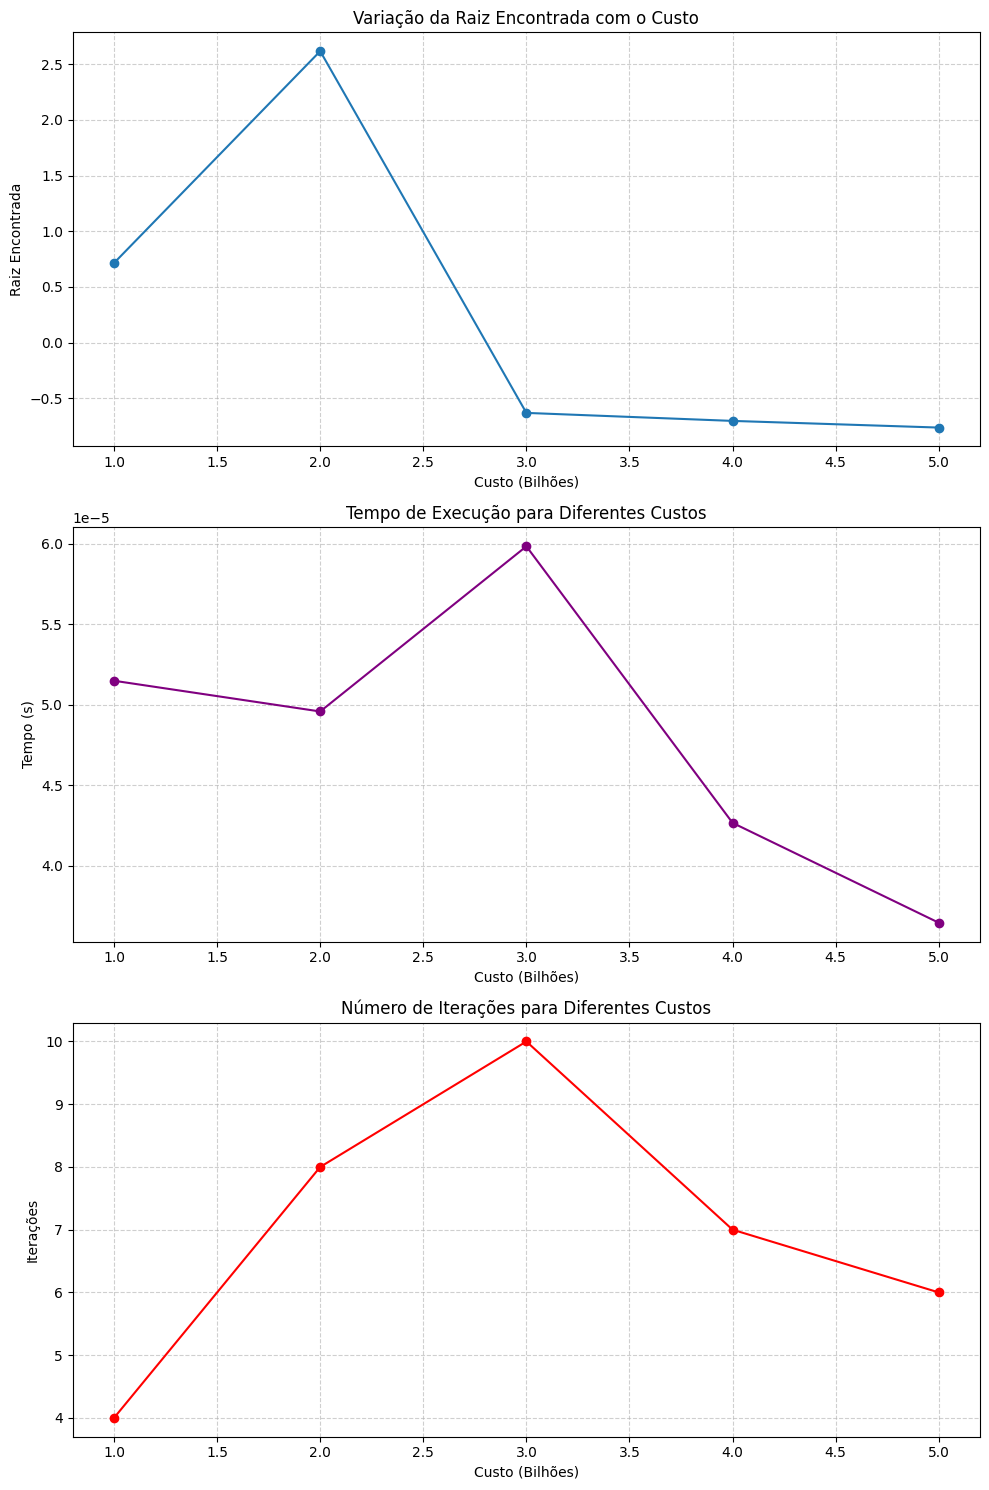

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de Raiz Encontrada
axs[0].plot(df_results['Custo (Bilhões)'], df_results['Raiz Encontrada'], marker='o', linestyle='-')
axs[0].set_title('Variação da Raiz Encontrada com o Custo')
axs[0].set_xlabel('Custo (Bilhões)')
axs[0].set_ylabel('Raiz Encontrada')
axs[0].grid(axis='both', linestyle='--', alpha=0.6)

# Gráfico de Tempo
axs[1].plot(df_results['Custo (Bilhões)'], df_results['Tempo (s)'], color='purple', marker='o', linestyle='-')
axs[1].set_title('Tempo de Execução para Diferentes Custos')
axs[1].set_xlabel('Custo (Bilhões)')
axs[1].set_ylabel('Tempo (s)')
axs[1].grid(axis='both', linestyle='--', alpha=0.6)

# Gráfico de Iterações
axs[2].plot(df_results['Custo (Bilhões)'], df_results['Iterações'], color='red', marker='o', linestyle='-')
axs[2].set_title('Número de Iterações para Diferentes Custos')
axs[2].set_xlabel('Custo (Bilhões)')
axs[2].set_ylabel('Iterações')
axs[2].grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# `Método do Ponto Fixo`
## Parâmetros Utilizados no Método:
1. Função Definida para o Método:
- `Q`: Valor Atual
- `C`: Constante utilizada na função `f`
2. Função Principal: 
- `C`: Constante utilizada na função `f` e sua derivada `df`
- `x0`: Chute inicial para o valor de `Q`
- `err`: Tolerância para a convergência
- `max_iter`: Número máximo de iterações permitidas
## Passo a Passo do Algoritmo:

In [24]:
# Definindo a função phi(Q) usada no método do ponto fixo
def phi(Q, C):
    try:
        # Limitar o domínio para evitar overflow
        value = C * np.exp(Q) / 4
        # Garantir que não estamos calculando a raiz quadrada de um número negativo
        if value < 0:
            return float('nan')
        return np.sqrt(value)
    except OverflowError:
        return float('nan')  # Retorna NaN em caso de overflow

def ponto_fixo(C, x0, err, max_iter=100):
    start_time = time.time()
    # Inicializando x1 com o valor inicial x0
    x1 = x0
    # Verificando se o valor inicial x0 já está próximo do zero (dentro do erro tolerável)
    if abs(f(x0, C)) < err:
        # Retornando o valor inicial x0
        return x0, abs(f(x0, C)), 0, time.time() - start_time
    # Iniciando o loop para as iterações do método do ponto fixo
    for i in range(max_iter):
        # Calculando o próximo valor de x usando a função phi
        x2 = phi(x1, C)
        # Verificando se o novo valor de x está suficientemente próximo do zero (dentro do erro tolerável)
        # ou se a diferença entre os valores sucessivos de x é menor que o erro tolerável
        if abs(f(x2, C)) < err or abs(x2 - x1) < err:
            # Retornando o valor final x2 e o banco de dados
            return x2, abs(f(x2, C)), i + 1, time.time() - start_time
        
        # Atualizando x1 com o valor de x2 para a próxima iteração
        x1 = x2
    # Se o número máximo de iterações for atingido, retornando o valor atual de x1 e o banco de dados
    return x1, abs(f(x1, C)), max_iter, time.time() - start_time


In [25]:
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial
err = 1e-4  # Tolerância de erro
results = []
for C in c_values:
    root, final_error, iterations, exec_time = ponto_fixo(C, x0, err)
    results.append((C, root.round(4), final_error, exec_time, iterations))

/home/artur/TrabalhoMetodosNumericos/func_main.py:4: RuntimeWarning: overflow encountered in exp
  return C*np.exp(Q) - 4*Q**2
/tmp/ipykernel_859/1346638082.py:5: RuntimeWarning: overflow encountered in exp
  value = C * np.exp(Q) / 4
/home/artur/TrabalhoMetodosNumericos/func_main.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  return C*np.exp(Q) - 4*Q**2
/tmp/ipykernel_859/1346638082.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(f(x2, C)) < err or abs(x2 - x1) < err:


In [26]:
df_results = pd.DataFrame(results, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações'])
pd.options.display.float_format = '{:.12f}'.format  # Ajustar formatação para melhor visualização
print(df_results.to_string(index=False))

 Custo (Bilhões)  Raiz Encontrada           Erro      Tempo (s)  Iterações
               1   0.714800000000 0.000193741851 0.000063657761          8
               2   1.487700000000 0.000688334304 0.000094175339         26
               3              inf            NaN 0.000755786896        100
               4              inf            NaN 0.000488758087        100
               5              inf            NaN 0.000465631485        100
